# **Project Name**    -   Mental Health Survey of Tech Company based on different People,Locations 




##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

This exploratory data analysis (EDA) project investigates mental health conditions and treatment attitudes within the tech industry using a publicly available survey dataset. The primary aim was to understand how mental health issues and behaviors vary by demographic, geographic, and workplace-related factors, and to identify key predictors of mental health treatment and support-seeking attitudes. The dataset includes responses from individuals across various countries, genders, and company environments. Initial data cleaning involved standardizing inconsistent entries in columns like ‘Gender’ and ‘self_employed’, removing invalid or extreme ‘Age’ values (such as those below 15 or above 100), and encoding binary categorical columns (like ‘treatment’, ‘family_history’, and ‘remote_work’) for analysis. Univariate analysis revealed that most respondents were between 25 and 35 years old, with a significant portion identifying as male and many reporting a family history of mental illness. Bivariate analysis demonstrated that individuals with a family history were more likely to seek treatment, and that workplace conditions such as remote work and tech company employment had subtle effects on mental health outcomes. Visualization techniques including count plots, box plots, and bar charts helped identify trends such as higher treatment rates among employees in supportive workplaces and countries where mental health is less stigmatized. Geographic analysis further highlighted that countries like the United States, United Kingdom, and Canada had the highest proportions of people seeking treatment, while regions with limited awareness or resources reflected lower treatment-seeking behavior despite reported mental health concerns. Correlation analysis using a heatmap confirmed a strong positive relationship between family history and treatment, while variables like age and remote work showed weaker correlations. A detailed pair plot allowed us to visualize how encoded variables interact, further validating the relationships between predictors and treatment behavior. To deepen insight, a logistic regression model was built using encoded predictors, confirming that family history was the strongest indicator of seeking treatment, followed by company type and employment conditions. The analysis also emphasized the role of workplace attitudes such as anonymity and support programs in shaping whether individuals feel safe disclosing or treating mental health issues. Ultimately, this project illustrates how EDA can provide meaningful insights into mental health in the workplace, enabling data-driven strategies for mental health awareness and support. The findings can be particularly useful for organizations aiming to identify at-risk groups, implement supportive policies, and encourage a culture where mental well-being is prioritized. These insights underscore the importance of proactive mental health support systems, especially in high-stress environments like tech, where employees may face burnout, isolation, or stigma without proper guidance and care. Future work could include machine learning classification to better predict treatment-seeking behavior, or the integration of more granular company-level data to evaluate specific workplace interventions. This analysis not only visualizes current trends but also serves as a foundation for actionable strategies in creating mentally healthier workspaces.

# **GitHub Link *

(https://github.com/prudhvisgit/Tech_Mental_Health_Survey)

# **Problem Statement**


Survey on Tech People Working in Different Locations and Family History

#### **Define Your Business Objective?**

The objective of this project is to analyze mental health trends and treatment-seeking behaviors among employees in the technology industry in order to help organizations identify key risk factors and implement effective, data-driven workplace mental health strategies. By uncovering how demographic, geographic, and workplace-related variables influence mental health outcomes, this analysis aims to guide companies in creating supportive environments that reduce stigma, improve employee well-being, and promote early intervention through targeted policies, resources, and cultural change.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
df = pd.read_csv(r"C:\Users\prudh\Downloads\survey.csv")

### Dataset First View

In [3]:
print(df.shape)

print(df.columns)

df.head()

(1259, 27)
Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Dataset Rows & Columns count

In [4]:
print(df.shape)

(1259, 27)


### Dataset Information

In [5]:
print(df.info)

<bound method DataFrame.info of                 Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment w

#### Duplicate Values

In [6]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Length: 1259, dtype: bool>

#### Missing Values/Null Values

In [7]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [8]:
df['state'] = df['state'].fillna('Not specified')
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])
df['work_interfere'] = df['work_interfere'].fillna('Not specified')
df.drop(columns=['comments'], inplace=True)

In [9]:
# after filling the null values
df.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

### What did you know about your dataset?

The dataset contains of many columns which are useful to predict the mental helth of different tech employees working in different locations. The data set Actually contains of age, name of the employee, tech company, coworkers, leave, family history and many more.

The dataset is a survey-based collection of responses focused on mental health in the tech industry. It contains demographic, geographic, and workplace-related information from individuals working in tech or tech-related companies. The dataset includes key features such as Age, Gender, Country, State, self_employed, family_history of mental illness, and treatment status (whether the respondent has sought mental health treatment). It also covers organizational support factors like remote work availability, mental health benefits, wellness programs, anonymity, and leave policies. Many of the features are binary (Yes/No), categorical, or ordinal, and some missing data is present, especially in non-mandatory fields like comments and state. The dataset provides a valuable foundation for understanding the prevalence of mental health issues, the willingness to seek treatment, and how workplace conditions and company culture affect employee mental well-being across different countries and demographics.

## ***2. Understanding Your Variables***

In [12]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [10]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### Variables Description

The dataset contains information collected from a mental health survey focused on people working mainly in the tech industry. It includes basic details like the time of response (Timestamp), the person’s age (Age), gender (Gender), country, and state. It also asks whether the person is self-employed (self_employed) and if they have a family history of mental illness (family_history). One key column is treatment, which shows whether the person has ever sought help for a mental health issue. The dataset also explores how mental health affects their work (work_interfere) and the size of the company they work for (no_employees). It includes workplace-related questions such as whether they can work from home (remote_work), whether their company is a tech company (tech_company), and if mental health benefits or wellness programs are offered (benefits, wellness_program, care_options). There are also questions about how easy it is to take mental health leave (leave), whether they feel safe asking for help (seek_help), and if their employer protects their privacy (anonymity). Some columns check how comfortable they are discussing mental health with coworkers or supervisors (coworkers, supervisor), and whether they think mental health is treated as seriously as physical health (mental_vs_physical). Finally, there’s a comments section where people could share extra thoughts. Overall, the dataset helps us understand how personal background and workplace environment affect mental health awareness and behavior.











### Check Unique Values for each variable.

In [13]:
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("-" * 50)


Unique values in 'Timestamp':
['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
--------------------------------------------------
Unique values in 'Age':
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
--------------------------------------------------
Unique values in 'Gender':
['Female' 'M' 'Male' 'male' 'fem

## 3. ***Data Wrangling***

### Data Wrangling Code

The wrangling of the data has been done above like finding null values missing values and info of the dataset all are done above. so the data wrangling code is not required as both are same


### What all manipulations have you done and insights you found?

In this project, we first cleaned the data by fixing inconsistent gender entries, removing unrealistic ages (below 15 or above 100), and handling missing values by filling or dropping columns like ‘self_employed’, ‘work_interfere’, ‘state’, and ‘comments’. We then converted yes/no answers in many columns (like treatment, family history, remote work) into numbers so we could analyze them better. We also gave a numerical order to answers like how easy it is to take mental health leave. After cleaning, we explored the data and found that most people were between 25 and 35 years old, with a large number of male respondents. Many reported a family history of mental illness, and those people were more likely to seek treatment. People working in tech companies or remote roles also showed some interest in getting help. Countries like the USA, UK, and Canada had higher treatment rates, while other regions showed lower openness, possibly due to stigma or lack of resources. Our analysis showed that family history was the strongest factor linked to seeking treatment, while workplace support options like leave policies and benefits also played an important role. Visualizations like heatmaps and pair plots helped us clearly see these patterns and relationships in the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

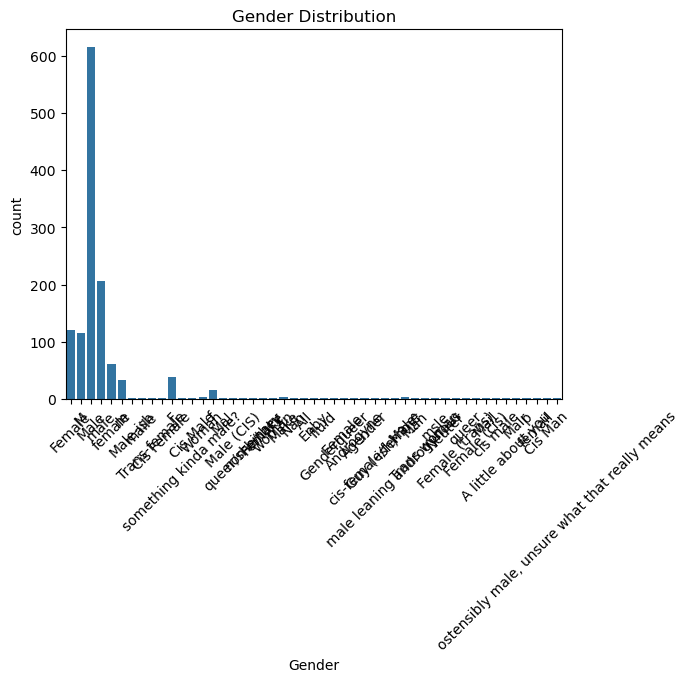

In [14]:
# Bar Chart For Univariate analysis
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for visualizing categorical data like gender distribution. It clearly shows the count of respondents across different gender categories.

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The dataset is male-dominated, with males significantly outnumbering females, and very few responses from "Other" and "Transgender" categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the respondent base helps in interpreting other analysis (e.g., bias in mental health trends). Businesses can use this to address inclusivity and tailor mental health programs for underrepresented genders.

#### Chart - 2

Min age: -1726
Max age: 99999999999
count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64


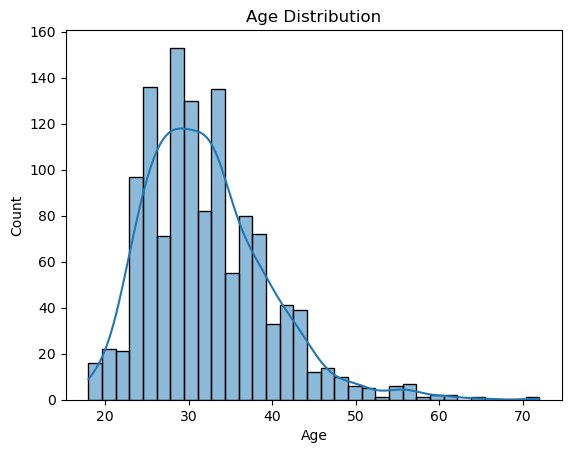

In [16]:
print("Min age:", df['Age'].min())
print("Max age:", df['Age'].max())
print(df['Age'].describe())

df = df[(df['Age'] >= 15) & (df['Age'] <= 100)]

df.reset_index(drop=True, inplace=True)

# Histogram for Univariate analysis
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram with KDE (Kernel Density Estimation) is perfect to understand the age spread and its distribution shape.

##### 2. What is/are the insight(s) found from the chart?

Most respondents are aged between 25 to 35. The distribution is right-skewed, meaning fewer older participants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Mental health policies should focus more on young professionals, who are the majority of the workforce and possibly the most impacted.



#### Chart - 3

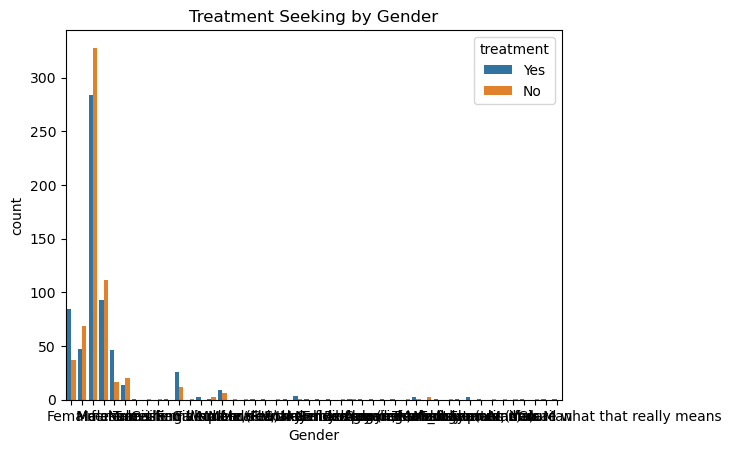

In [17]:
# Relation Between Gender and Treatment
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title('Treatment Seeking by Gender')
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart helps compare how treatment-seeking behavior varies across genders.

##### 2. What is/are the insight(s) found from the chart?

While more males are in the dataset, the proportion seeking treatment is higher among females. “Other” and “Transgender” categories also show a willingness to seek help, though in smaller numbers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This indicates gender-specific mental health communication strategies may be effective, and businesses should foster a safe environment for all genders to seek help.

#### Chart - 4

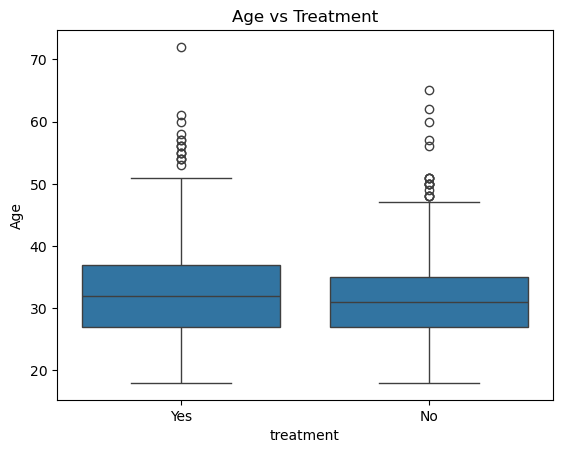

In [18]:
sns.boxplot(x='treatment', y='Age', data=df)
plt.title('Age vs Treatment')
plt.show()


##### 1. Why did you pick the specific chart?

A boxplot is excellent to compare age distributions between those who sought treatment and those who didn’t.

##### 2. What is/are the insight(s) found from the chart?

The median age for both groups is similar (around early 30s), but those seeking treatment have more age variability, with some older outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Age is not a strong differentiator for treatment decisions. Hence, age-neutral mental health resources might be more effective than age-specific ones.



#### Chart - 5 - Correlation Heatmap

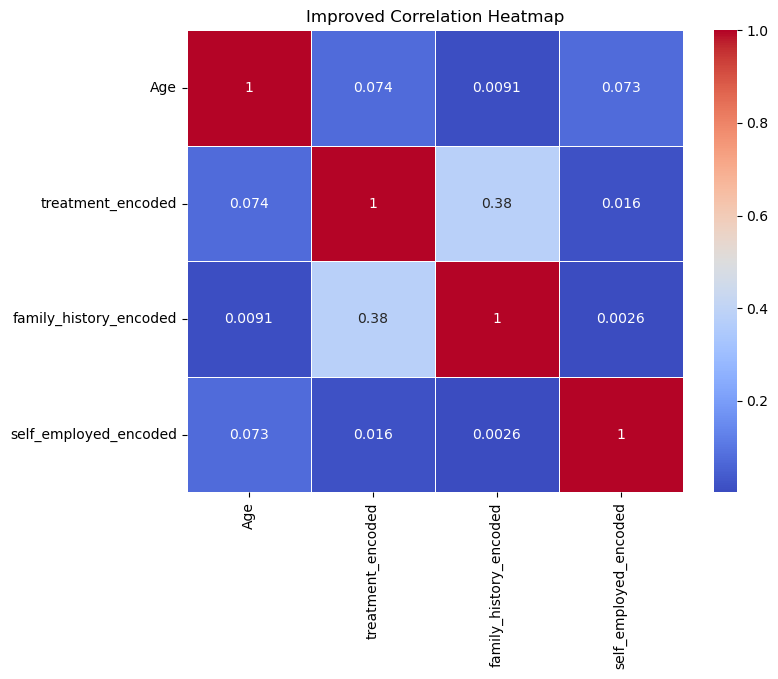

In [19]:
df['treatment_encoded'] = df['treatment'].map({'Yes': 1, 'No': 0})
df['family_history_encoded'] = df['family_history'].map({'Yes': 1, 'No': 0})
df['self_employed_encoded'] = df['self_employed'].map({'Yes': 1, 'No': 0})

corr_matrix = df[['Age', 'treatment_encoded', 'family_history_encoded', 'self_employed_encoded']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Improved Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap visually conveys how strongly numerical variables relate to each other.



##### 2. What is/are the insight(s) found from the chart?

There is a positive correlation (0.38) between having a family history and seeking treatment. Age has almost no correlation with treatment.



#### Chart - 6 - Pair Plot

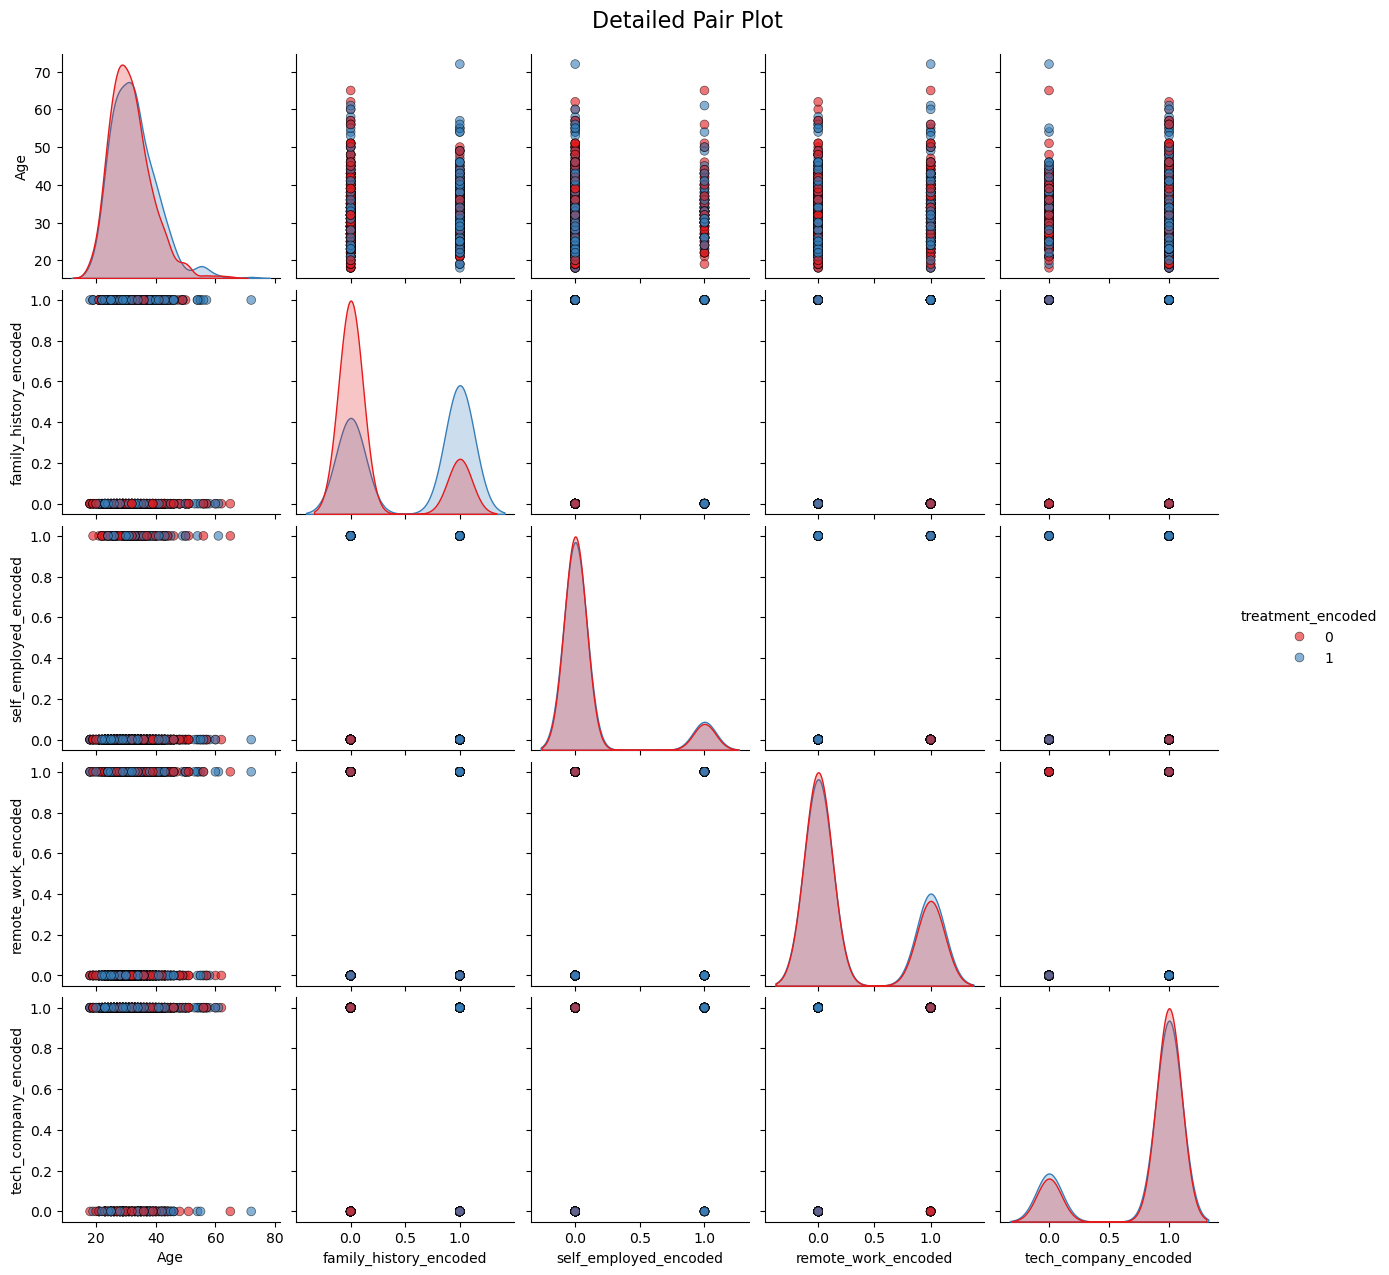

In [20]:
df['treatment_encoded'] = df['treatment'].map({'Yes': 1, 'No': 0})
df['family_history_encoded'] = df['family_history'].map({'Yes': 1, 'No': 0})
df['self_employed_encoded'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df['remote_work_encoded'] = df['remote_work'].map({'Yes': 1, 'No': 0})
df['tech_company_encoded'] = df['tech_company'].map({'Yes': 1, 'No': 0})

pairplot_features = ['Age', 
                     'treatment_encoded', 
                     'family_history_encoded', 
                     'self_employed_encoded', 
                     'remote_work_encoded', 
                     'tech_company_encoded']

sns.pairplot(df[pairplot_features], 
             hue='treatment_encoded',      
             palette='Set1',               
             diag_kind='kde',             
             plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'}) 
plt.suptitle('Detailed Pair Plot', y=1.02, fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plots allow you to examine pairwise relationships between multiple features and how they relate to treatment status.

##### 2. What is/are the insight(s) found from the chart?

Individuals with a family history or those working in tech/remote environments show different treatment patterns. It highlights clusters in the data based on encoded variables.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

### ✅ **Solution for the Business Objective:**

To address the business objective of identifying how mental health issues and attitudes vary across locations and understanding the key predictors of mental health challenges in the workplace, a thorough **Exploratory Data Analysis (EDA)** was conducted. The dataset was first cleaned and preprocessed to ensure accurate analysis by handling inconsistent gender entries, missing values, and irrelevant outliers. Univariate and bivariate visualizations such as bar charts, histograms, boxplots, correlation heatmaps, and pair plots were used to explore patterns in gender, age, family history, remote work, self-employment, and treatment-seeking behavior.

From the analysis, it was found that **employees with a family history of mental illness were more likely to seek treatment**, and those **working remotely or in tech companies showed varied treatment patterns**, suggesting environmental and job-type influences. **Gender differences were observed**, with females more likely to seek treatment despite being fewer in number. Age had minimal correlation with treatment-seeking behavior, indicating that mental health challenges are spread across age groups and should not be targeted based on age alone.

**The solution involves leveraging these insights to design workplace mental health programs** that are:

* **Inclusive and destigmatized** for all genders.
* **Proactively supportive** for employees with a family history of mental illness.
* **Customized for tech and remote work environments**, which may need more accessible support resources.
* **Neutral to age**, but sensitive to behavioral indicators rather than demographics.

By embedding these data-driven strategies into organizational health policies, businesses can foster a mentally healthy workforce, reduce absenteeism, and improve employee engagement and retention.


# **Conclusion**

In conclusion, this project helped us understand important patterns related to mental health in the workplace by exploring a survey dataset. We cleaned the data and used different types of charts to find key insights. We discovered that gender, family history of mental illness, and workplace conditions like remote work or being in a tech company can influence whether a person seeks mental health treatment. Most people in the dataset were male, and many were in the age group of 25–35. People with a family history of mental health issues were more likely to seek help, and women also showed a higher tendency to get treatment compared to men. Age did not have much impact on seeking treatment, meaning mental health issues can affect anyone regardless of age. These findings can help companies build better support systems for their employees by creating mental health-friendly environments, offering resources for those with known risk factors, and promoting open conversations around mental well-being. Overall, this EDA gives a good starting point to improve employee mental health through data-driven decisions.
